# Support Vector Machine

In this module, we learn to use Support Vector Machine to solve binary classification problems. The complete explanation for this notebook is available at https://youranalystbuddy.com/support-vector-machine-for-binary-classification/

## Linear Support Vector Machine for Binary Classification

We start with the simplest case: linear SVM for binary classification. Let's simulate a simple dataset with two features so we can visualize the model.

<b>⚠️ Important: all the visualizations in this notebook are only possible in one-dimensional or two-dimensional  (only one or two features besides the target) in data. In general, data with higher dimensionality cannot be visualized in 2D plot</b>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

#create some instances 
X = np.array([
    [2,2], [3,4], [4,2], [2.82,2.82], [2,4], [2,6],
    [6,6], [6,10], [7,4], [7.2,6.4], [6.5,7.5], [5,8]
])

Y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])

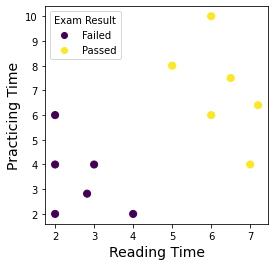

In [2]:
#and visualize them
#horizontal and vertical axes represent the two features
#colors represents the two classes
plt.figure(figsize=(4,4))
classes = ['Failed','Passed']
scatter = plt.scatter(X[:,0], X[:,1], s=50, c=Y)
plt.legend(handles=scatter.legend_elements()[0], labels=classes, title="Exam Result")
plt.xlabel('Reading Time', fontsize=14)
plt.ylabel('Practicing Time', fontsize=14)
plt.show()

# Modeling

## Simple classification strategy
What is the simplest way to classify the two classes in the above example?

We can draw a line that separates instances in the two classes, and predict the instances' classes based on their positions with respect to the boundary line (above or below the line)

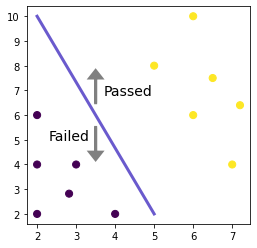

In [3]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=50, c=Y)
plt.plot([2,5],[10,2],color='slateblue',linewidth=3)
plt.text(3.7,6.8,'Passed',fontsize=14)
plt.arrow(3.5, 6.5, 0, 1, linewidth=3, head_width=0.3, head_length=0.3, color='gray')
plt.text(2.3,5,'Failed',fontsize=14)
plt.arrow(3.5, 5.5, 0, -1, linewidth=3, head_width=0.3, head_length=0.3, color='gray')
plt.show()

However, there are an infinite number of lines that can separate the two classes in this example. Which one is the best one?

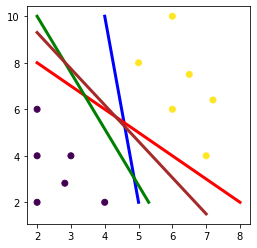

In [4]:
#and visualize them
#colors will represent the two classes in this case
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot([4,5],[10,2],linewidth=3,c='blue')
plt.plot([2,8],[8,2],linewidth=3,c='red')
plt.plot([2,5.3],[10,2],linewidth=3,c='green')
plt.plot([2,7],[9.3,1.5],linewidth=3,c='brown')
plt.show()

## Logistic regression boundary

The boundary construct by a logistic regression model

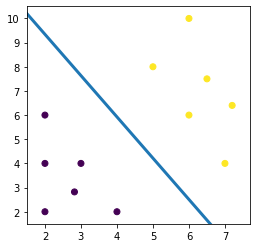

In [5]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X,Y)

x1_lg = np.linspace(0,10,101)
x2_lg = (- logistic.intercept_ - logistic.coef_[0,0]*x1_lg)/logistic.coef_[0,1]
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(x1_lg,x2_lg,linewidth=3)
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
plt.show()

## Decision tree boundary

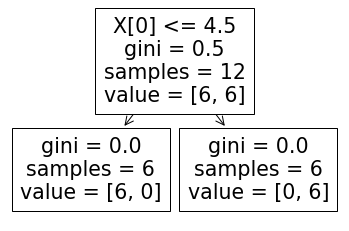

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier()
tree.fit(X,Y)

plot_tree(tree)
plt.show()

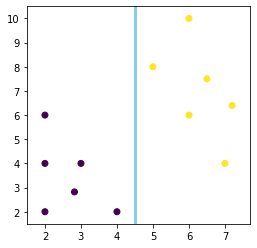

In [7]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.axvline(x = 4.5, color = 'skyblue', linewidth=3)
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
plt.show()

## Linear support vector machine

A Linear SVM will draw an optimized boundary to separate the two classes. Let's find how it looks like

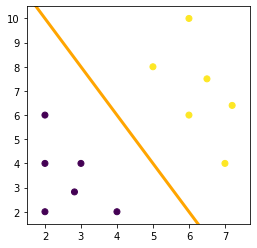

In [8]:
#now fit a linear SVM
from sklearn.svm import SVC

lsvc = SVC(C=1000, kernel='linear')
lsvc.fit(X,Y)

x1_lsvc = np.linspace(0,10,101)
x2_lsvc = (- lsvc.intercept_ - lsvc.coef_[0,0]*x1_lsvc)/lsvc.coef_[0,1]
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=Y)
plt.plot(x1_lsvc,x2_lsvc,linewidth=3,color='orange')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
plt.show()

Now let's compare all the boundaries

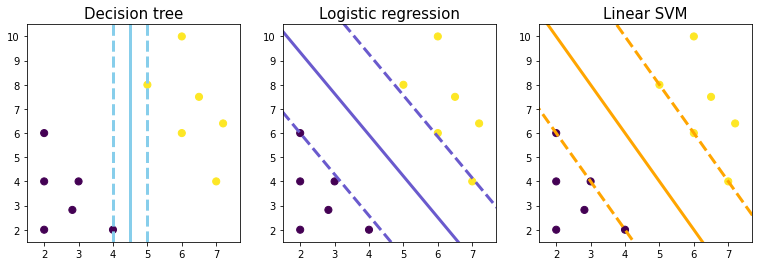

In [9]:
plt.figure(figsize=(13,4))

plt.subplot(131)
plt.scatter(X[:,0],X[:,1],s=50,c=Y)
plt.axvline(x=4,linestyle="--", color='skyblue', linewidth=3)
plt.axvline(x=5,linestyle="--", color='skyblue', linewidth=3)
plt.axvline(x=4.5, color='skyblue', linewidth=3)
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
plt.title('Decision tree', fontsize=15)

plt.subplot(132)
plt.scatter(X[:,0],X[:,1],s=50,c=Y)
margin = 6 - x2_lg[x1_lg==2]
plt.plot(x1_lg,x2_lg+margin,linestyle="--",linewidth=3,color='slateblue')
plt.plot(x1_lg,x2_lg-margin,linestyle="--",linewidth=3,color='slateblue')
plt.plot(x1_lg,x2_lg,linewidth=3,color='slateblue')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
plt.title('Logistic regression', fontsize=15)

plt.subplot(133)
plt.scatter(X[:,0],X[:,1],s=50,c=Y)
margin = 6 - x2_lsvc[x1_lsvc==2]
plt.plot(x1_lsvc,x2_lsvc-margin,linestyle="--",linewidth=3,color='orange')
plt.plot(x1_lsvc,x2_lsvc+margin,linestyle="--",linewidth=3,color='orange')
plt.plot(x1_lsvc,x2_lsvc,linewidth=3,color='orange')
plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)
plt.title('Linear SVM', fontsize=15)

plt.show()

We can redraw the above example with the boundaries and support vectors added

In [10]:
##function to draw the SVM
def draw_svm(x,y,svm): #draw a the trained svm and its separation line, boundaries, and support vectors
    w = svm.coef_[0]
    a = -w[0] / w[1]
    x_line = np.linspace(0, 10)
    y_line = a * x_line - (svm.intercept_[0]) / w[1]

    margin = 1 / np.sqrt(np.sum(svm.coef_**2))
    y_line_down = y_line - np.sqrt(1 + a**2) * margin
    y_line_up = y_line + np.sqrt(1 + a**2) * margin

    plt.scatter(lsvc.support_vectors_[:, 0], lsvc.support_vectors_[:, 1], s=150, c='red')
    plt.scatter(x[:,0], x[:, 1], s=50, c=y)
    plt.plot(x_line, y_line, color='orange', linewidth=3)
    plt.plot(x_line, y_line_down, "--", color='orange', linewidth=3, alpha=0.7)
    plt.plot(x_line, y_line_up, "--", color='orange', linewidth=3, alpha=0.7)

    plt.xlim(X[:,0].min()-0.5, X[:,0].max()+0.5)
    plt.ylim(X[:,1].min()-0.5, X[:,1].max()+0.5)

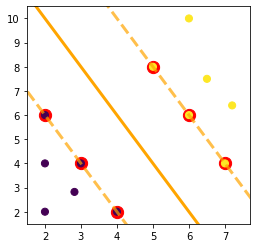

In [11]:
plt.figure(figsize=(4,4))
draw_svm(X,Y,lsvc)
plt.show()

## The soft boundary problem

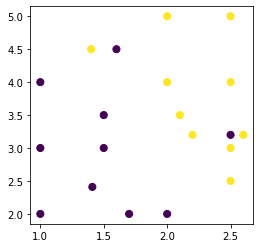

In [12]:
#create some instances 
X = np.array([
    [1,2], [1.5,3], [2,2], [1.41,2.41], [1,3], [1,4], [1.6,4.5], [2.5,3.2], [1.5,3.5], [1.7,2],
    [2.2,3.2], [2,5], [2.5,2.5], [2.6,3.2], [2.1,3.5], [2.5,4], [1.4,4.5], [2,4], [2.5,3], [2.5,5]
])

Y = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=50, c=Y)
plt.show()

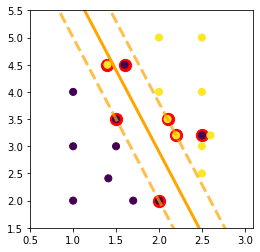

In [13]:
lsvc = SVC(C=1000, kernel='linear')
lsvc.fit(X,Y)

plt.figure(figsize=(4, 4))
draw_svm(X,Y,lsvc)
plt.show()

With errors, the optimal separation is less obvious. Furthermore, the support vectors are now all points lying between the boundaries of the classes. This introduce a regularization parameter "C" that decides how "soft" the boundaries are. Smaller C leads to softer boundaries -- more support vectors can be inside the boundaries regions, and higher C means harder boundaries with less support vectors in that regions.

Let's try compare C=0.1 and C=100

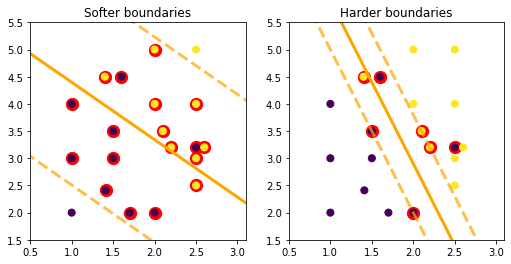

In [14]:
plt.figure(figsize=(8.5,4))

plt.subplot(121)
lsvc = SVC(C=0.1, kernel='linear')
lsvc.fit(X,Y)
draw_svm(X,Y,lsvc)
plt.title("Softer boundaries")

plt.subplot(122)
lsvc = SVC(C=100, kernel='linear')
lsvc.fit(X,Y)
draw_svm(X,Y,lsvc)
plt.title("Harder boundaries")

plt.show()

# Kernel support vector machine

The previous examples are on <b>linearly separable</b> data -- the two classes can be separated by a straight line. This case is quite rare in real world data where the boundary may be curves. In the example below, the data is not linearly separable because we cannot draw a straight line to separate the classes.

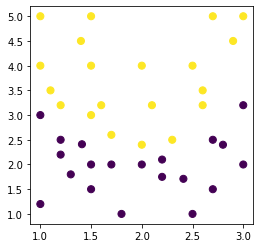

In [15]:
#create some instances 
X = np.array([
    [1.2,2.2], [1.3,1.8], [2,2], [1.41,2.41], [1,3], [1,1.2], [1.2,2.5], [2.8,2.4], [1.5,1.5], [1.7,2],
    [3,2], [2.7,2.5], [1.8,1], [2.41,1.71], [2.2,1.75], [2.2,2.1], [3,3.2], [1.5,2], [2.5,1], [2.7,1.5],
    [1.2,3.2], [1,5], [1.7,2.6], [1.6,3.2], [1.1,3.5], [1.5,4], [1.4,4.5], [1,4], [1.5,3], [1.5,5],
    [2.6,3.2], [2.7,5], [2.3,2.5], [2.1,3.2], [2.6,3.5], [2,4], [2.9,4.5], [2.5,4], [2,2.4], [3,5]
])

Y = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])

plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], s=50, c=Y)
plt.show()

Compare linear SVM with RBF SVM and polynomial SVM

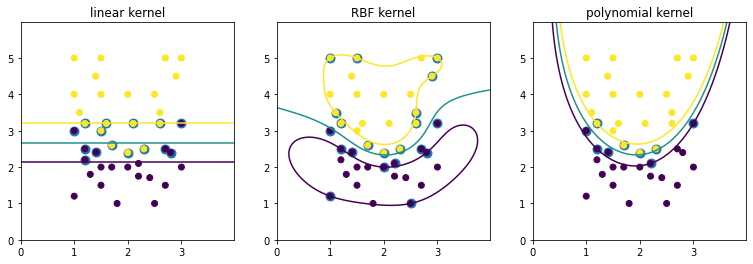

In [16]:
from sklearn.svm import SVC

lsvc = SVC(kernel='linear').fit(X,Y)
svc_rbf = SVC(kernel='rbf', gamma=1, C=2).fit(X,Y)
svc_poly = SVC(kernel='poly',degree=3, coef0=2).fit(X,Y)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x_line, y_line = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

titles = ['linear kernel',
          'RBF kernel',
          'polynomial kernel']


plt.figure(figsize=(13,4))
for i, clf in enumerate((lsvc, svc_rbf, svc_poly)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(1, 3, i+1)

    Z = clf.decision_function(np.c_[x_line.ravel(), y_line.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x_line.shape)
    plt.contour(x_line, y_line, Z, levels=[-1,0,1])

    # Plot also the training points
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80)
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.title(titles[i])

plt.show()